In [5]:
import torch
import matplotlib.pyplot as plt

from torch import nn
from skimage import data

In [2]:
rgb = data.astronaut()
rgb_tns = torch.Tensor(rgb)

rgb_tns = rgb_tns.permute(2, 0, 1) # canal de cores primeiro
rgb_tns = rgb_tns.view(1, rgb_tns.size(0), rgb_tns.size(1), rgb_tns.size(2)) # adiciona a dimensao do batch na primeira posicao

rgb_tns.size()

torch.Size([1, 3, 512, 512])

In [3]:
bloco_conv = nn.Sequential(
                nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
                nn.BatchNorm2d(num_features=32),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2)
             )

print(bloco_conv)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [4]:
print("Dimensão dado original:", rgb_tns.size())

saida = bloco_conv(rgb_tns)

print("Dimensão dado processado:", saida.size())

Dimensão dado original: torch.Size([1, 3, 512, 512])
Dimensão dado processado: torch.Size([1, 32, 255, 255])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Como utilizamos o pooling com kernel_size = 2, a dimensão do dado após o processamento é 2x menor.

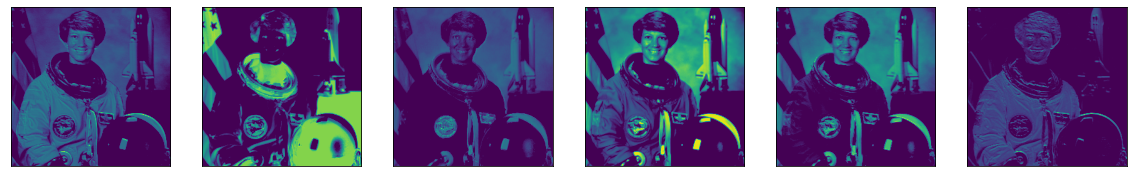

In [17]:
fig, axs = plt.subplots(1, 6, figsize=(20,20))
for k, ax in enumerate(axs):
    ax.imshow(saida[0,k,:,:].detach().numpy())
    ax.set_yticks([])
    ax.set_xticks([])